In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [39]:
data_train = pd.read_csv('data/train.csv')
test = pd.read_csv("data/test.csv", encoding = "ISO-8859-1")

In [6]:
data_train.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [76]:
data_train[data_train.toxic == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0
12,0005c987bdfc9d4b,hey what is it talk what is it an exclusive gr...,1,0,0,0,0,0
16,0007e25b2121310b,bye do not look come or think of comming back ...,1,0,0,0,0,0
42,001810bf8c45bf5f,you are gay or antisemmitian archangel white t...,1,0,1,0,1,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,our previous conversation you fucking shit eat...,1,0,1,0,1,1
159514,ff39a2895fc3b40e,you are a mischievious pubic hair,1,0,0,0,1,0
159541,ffa33d3122b599d6,your absurd edits your absurd edits on great w...,1,0,1,0,1,0
159546,ffb47123b2d82762,hey listen do not you ever delete my edits eve...,1,0,0,0,1,0


In [7]:
display(data_train.describe())

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data_train.shape

(159571, 8)

In [9]:
data_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [10]:
data_train.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [41]:

counts_category = []
categories = list(categorywise_data.columns.values)
for i in categories:
    counts_category.append((i, categorywise_data[i].sum()))
    
dataframe = pd.DataFrame(counts_category, columns=['Labels', 'number_of_comments']) 

In [12]:

categorywise_data = data_train.drop(['id', 'comment_text'], axis=1)
counts_category = []

categories = list(categorywise_data.columns.values)
for i in categories:
    counts_category.append((i, categorywise_data[i].sum()))
    
dataframe = pd.DataFrame(counts_category, columns=['Labels', 'number_of_comments'])
dataframe

,Labels,number_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


Text(0.5, 0, 'Labels')

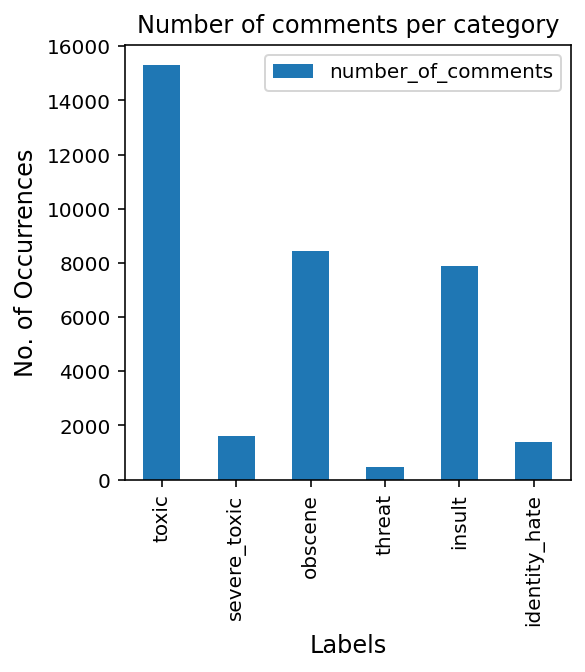

In [13]:

dataframe.plot(x='Labels', y='number_of_comments', kind='bar',figsize=(4,4))
plt.title("Number of comments per category")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Labels', fontsize=12)

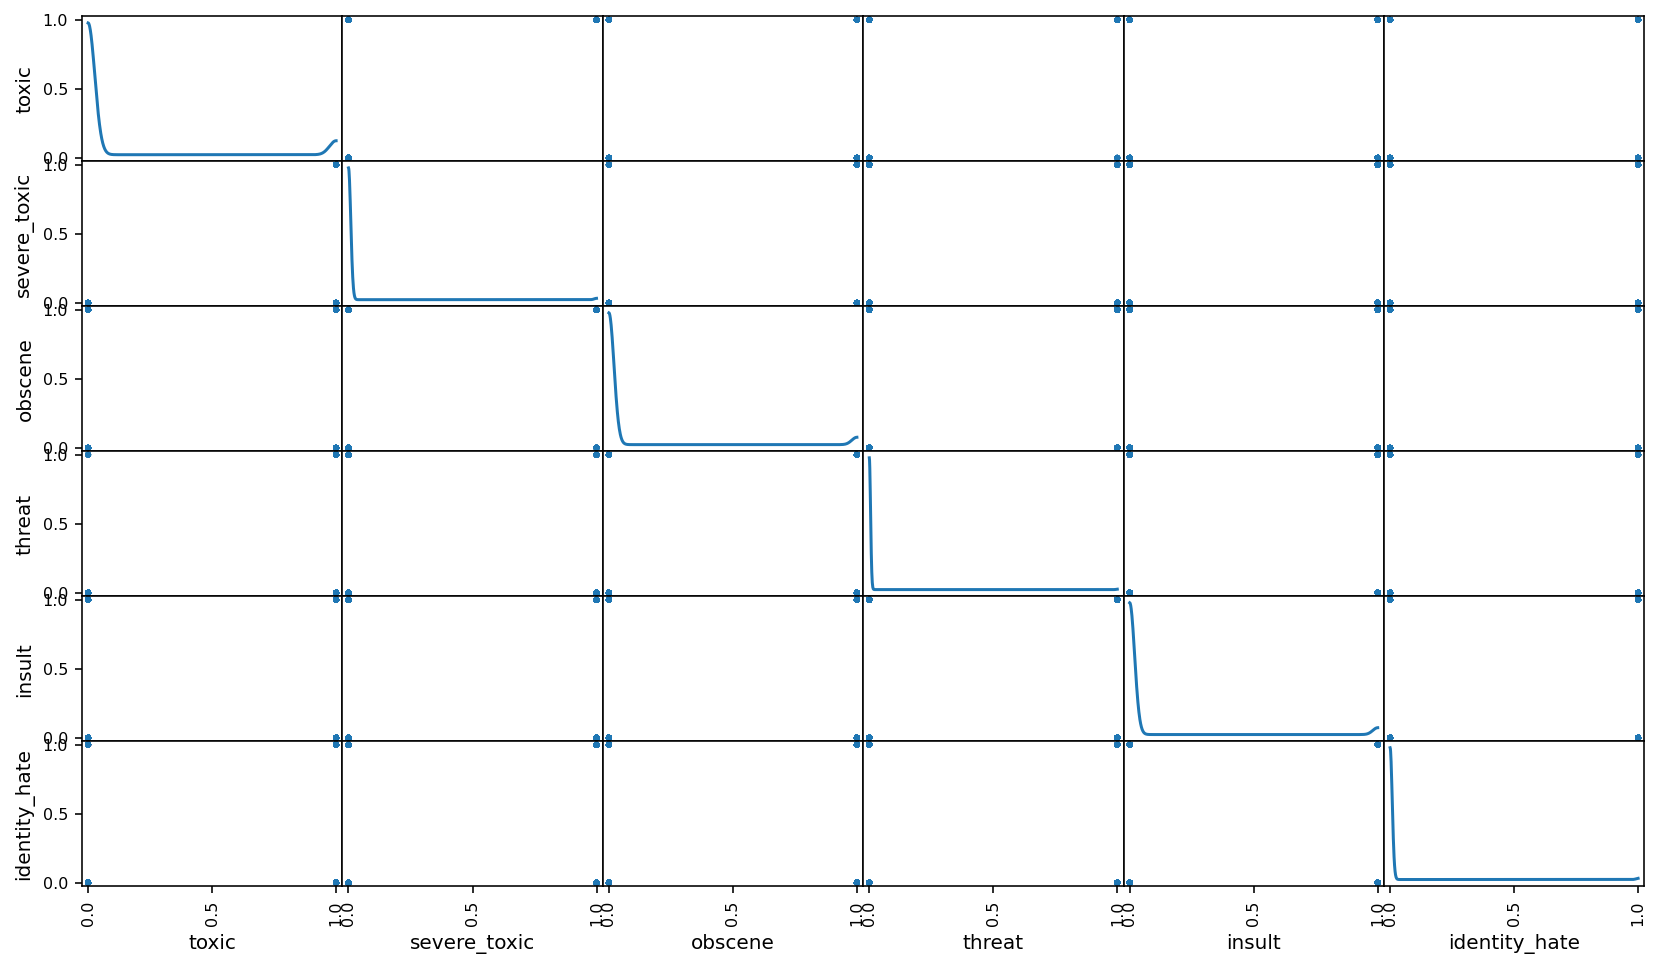

In [14]:
pd.plotting.scatter_matrix(data_train, alpha = 0.3, figsize = (14,8), diagonal = 'kde');